# Задача «Размен 2»

https://new.contest.yandex.ru/48703/problem?id=215/2023_04_11/oQfGXfjChL

In [14]:
# Задано одно целое число money. 
# Требуется представить число money в виде суммы минимального количества монет номиналами 1, 3, 4. 

def Change(money):
    table = [math.inf] * money
    table[0] = 0
    for m in range(1, money):
        for c in [1,3,4]:
            if c <= money:
                table[m] = min(table[m],1 + table[m-c])
    return table

money = int(input())
table = Change(money)
print(table[money-1])
# 34
# 9

34
9


# Примитивный калькулятор
https://new.contest.yandex.ru/48704/problem?id=215/2023_04_11/ZEGCrqimHU

In [76]:
# Найти минимальное количество операций, необходимых для получения числа n из числа 1, 
# если доступны операции +1, *2, *3
import math 

def Calculator(n):
    n += 1
    table = [math.inf] * (n)
    table[1] = 0 
    for i in range(2, n):
        table[i] = table[i-1] + 1
        if i % 2 == 0:
            table[i] = min(table[i], table[i//2] + 1)
        if i % 3 == 0:
            table[i] = min(table[i], table[i//3] + 1)
   
    operations = []
    m = n - 1
    operations.append(m)
    while m > 1:
        if table[m] == 1 + table[m-1]:
            m = m - 1
        if m % 2 == 0 and table[m] == 1 + table[m//2]:
            m = m // 2
        if m % 3 == 0 and table[m] == 1 + table[m//3]:
            tmp_m = m // 3
        m = tmp_m
        operations.insert(0, m)
    return table[n-1], operations

n = int(input())
k_operations, operations = Calculator(n)
operations = ' '.join(map(str, operations))
print(f'{k_operations}\n{operations}')
# 96234
# 14
# 1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234

96234
14
1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234


# Задача «Расстояние редактирования»
https://new.contest.yandex.ru/48705/problem?id=215/2023_04_11/OLLCX5Vgml

Редакционное расстояние между двумя строками определяется как 
минимальное число односимвольных вставок, удалений и замен, 
необходимых для преобразования одной строки в другую.

<div>
    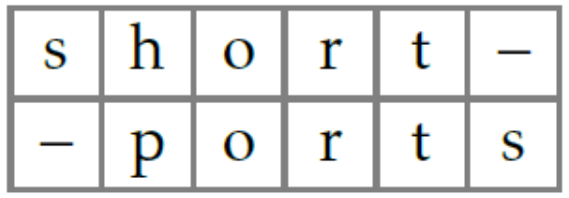
</div>

<div>
    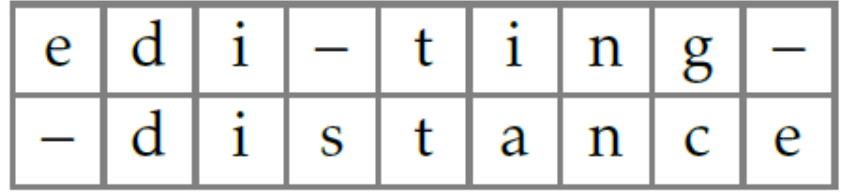
</div>

In [103]:
import math 

def EditDistance(A, B):
    n = len(A) + 1
    m = len(B) + 1
    D = [[0] * m for i in range(n)]
    for i in range(n):
        for j in range(m):
            if i == 0:
                D[i][j] = j
            elif j == 0:
                D[i][j] = i
            else:
                insertion = D[i][j - 1] + 1
                deletion = D[i - 1][j] + 1
                match = D[i - 1][j - 1]
                mismatch = D[i - 1][j - 1] + 1
                
                if A[i-1] == B[j-1]:
                    D[i][j] = min(insertion, deletion, match)
                elif A[i-1] != B[j-1]:
                    D[i][j] = min(insertion, deletion, mismatch)
    return D[n-1][m-1]

s1 = input()
s2 = input()
print(EditDistance(s1, s2))
# editing
# distance
# 5

editing
distance
5


# Наибольшая общая подпоследовательность из двух последовательностей

https://new.contest.yandex.ru/48706/problem?id=215/2023_04_11/LfJ9C3F9xp

In [111]:
import math 

def LongestCommonSubsequence(A, B):
    n = len(A) + 1
    m = len(B) + 1
    D = [[0] * m for i in range(n)]
    for i in range(n):
        for j in range(m):
            if i == 0:
                D[i][j] = 0
            elif j == 0:
                D[i][j] = 0
            else:
                insertion = D[i][j-1]
                deletion = D[i-1][j]
                if A[i-1] == B[j-1]:
                    match = D[i-1][j-1] + 1
                    D[i][j] = max(insertion, deletion, match)
                else:
                    mismatch = D[i-1][j-1]
                    D[i][j] = max(insertion, deletion, mismatch)
    return D[n-1][m-1]

A = list(map(int, input().split()))
B = list(map(int, input().split()))
# A = list(map(int, '7 2 9 3 1 5 9 4'.split()))
# B = list(map(int, '2 8 1 3 9 7'.split()))
# 3
print(LongestCommonSubsequence(A, B))

3


# Наибольшая общая подпоследовательность трех последовательностей

https://new.contest.yandex.ru/48706/problem?id=215/2023_04_11/lkN1DAomSk

In [143]:
import math 

def LCS3(A, B, C):
    a = len(A) + 1
    b = len(B) + 1
    c = len(C) + 1
    D = []
    for i in range(a):
        D.append([])
        for j in range(b):
            D[i].append([])
            for k in range(c):
                D[i][j].append(0)        
    for i in range(a):
        for j in range(b):
            for k in range(c):
                if i != 0 and j != 0 and k != 0:
                    if A[i-1] == B[j-1] == C[k-1]:
                        D[i][j][k] = max(D[i-1][j][k], D[i][j-1][k], D[i][j][k-1], D[i-1][j-1][k-1] + 1)
                    else:
                        D[i][j][k] = max(D[i-1][j][k], D[i][j-1][k], D[i][j][k-1], D[i-1][j-1][k-1])
    return D[a-1][b-1][c-1]

A = list(map(int, input().split()))
B = list(map(int, input().split()))
C = list(map(int, input().split()))
# A = list(map(int, '8 3 2 1 7'.split()))
# B = list(map(int, '8 2 1 3 8 10 7'.split()))
# C = list(map(int, '6 8 3 1 4 7'.split()))
# 3
# 8 1 7 
print(LCS3(A, B, C))

3

# Задача о рюкзаке

In [41]:
def Knapsack(w, V):
    n = len(w)
    pack = [[False] * (n + 1) for _ in range(V + 1)]
    pack[0][0] = True
    
    for i in range(1, n + 1):
        for v in range(V + 1):
            if v < w[i-1]:
                pack[v][i] = pack[v][i-1]
            else:
                pack[v][i] = pack[v][i-1] or pack[v - w[i-1]][i-1]
    return pack

V, n = 8, 3
w = [1, 3, 4]
K = Knapsack(w, V)

print('pack[v][w]')
print(*['-',0,1,2,3], sep = '\t')
for i in range(V+1):
    print(i, *K[i], sep = '\t')

pack[v][w]
-	0	1	2	3
0	True	True	True	True
1	False	True	True	True
2	False	False	False	False
3	False	False	True	True
4	False	False	True	True
5	False	False	False	True
6	False	False	False	False
7	False	False	False	True
8	False	False	False	True


In [141]:
objects = [('Гитара', 1, 1500),
           ('Магнитофон', 4, 3000),
           ('Ноутпук', 3, 2000),
           ('Iphone', 1, 2000)]

V = 4
n = len(objects)

pack = [[[[],0,0]] * (V+1) for _ in range(n+1)]
pack

ind_name = 0
ind_m = 1
ind_cost = 2

for ind in range(1, n + 1):
    name, m, cost = objects[ind-1]
    for v in range(1, V + 1):
        if v < m:
            pack[ind][v] = pack[ind-1][v]
        else:
            old_cost = pack[ind-1][v][ind_cost]
            new_cost = cost + pack[ind-1][v-m][ind_cost]
            if new_cost > old_cost:
                pack[ind][v] = [[name] + pack[ind-1][v-m][ind_name], m + pack[ind-1][v-m][ind_m], new_cost] 
            else:
                pack[ind][v] = pack[ind-1][v]
pack[n][V]

[['Iphone', 'Ноутпук'], 4, 4000]

# Наибольшее количество золота

In [155]:
# V, n = 10, 3
# M = [1, 4, 9]
# 10

# V, n = 73, 5
# M = [19, 23, 31, 17, 18]
# 73

# V, n = 44, 3
# M = [44, 43, 1]
# 44

V, n = map(int, input().split())
M = list(map(int, input().split()))

pack = [[0] * (V+1) for _ in range(n+1)]

for ind in range(1, n + 1):
    m = M[ind-1]
    for v in range(1, V + 1):
        if v < m:
            pack[ind][v] = pack[ind-1][v]
        else:
            pack[ind][v] = max(m + pack[ind-1][v-m], pack[ind-1][v])
print(pack[n][V])

44


# Задача «Сувениры»

Разделить массив на три поднабора одинаковой суммы

In [195]:
def Split(n, v):
    if sum(v) % 3 != 0:
        return False
    V = sum(v) // 3
    split = []
    for i in range(n + 1):
        split.append([])
        for j in range(V + 1):
            split[i].append([])
            for k in range(V + 1):
                split[i][j].append(False)
                
    split[0][0][0] = True
    
    for i in range(1, n+1):
        for s1 in range(0, V+1):
            for s2 in range(0, V+1):               
                split[i][s1][s2] = split[i-1][s1][s2]
                if s1 >= v[i-1]:
                    split[i][s1][s2] = split[i][s1][s2] or split[i - 1][s1 - v[i-1]][s2]
                if s2 >= v[i-1]:
                    split[i][s1][s2] = split[i][s1][s2] or split[i - 1][s1][s2 - v[i-1]]
                    
    return split[n][V][V]
n = int(input())
v = list(map(int, input().split()))
print(int(Split(n, v)))

3
1 2 3
0


# Задача «Расставить скобки»

In [ ]:
# Максимальное значение арифметического выражения

In [ ]:
# Вычисление арифметического выражения без скобок

In [ ]:
# Вычисление арифметического выражения со скобоками